In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [218]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data = data.astype(np.float32)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.250000,69.059998,62.080002,31.799999,63.009998,28.299999,36.930000,43.230000,42.310001,67.370003,...,74.389999,41.299999,30.049999,39.529999,76.070000,28.620001,72.029999,24.020000,76.029999,27.500000
1,38.110001,69.980003,62.389999,31.740000,62.490002,28.230000,37.130001,42.849998,41.849998,68.410004,...,74.690002,41.700001,30.180000,38.930000,75.709999,28.469999,72.110001,24.040001,76.050003,27.540001
2,37.900002,69.559998,62.820000,31.570000,62.740002,28.600000,36.570000,42.990002,41.480000,69.839996,...,75.139999,41.139999,30.090000,38.169998,75.559998,28.480000,72.540001,23.760000,75.660004,27.549999
3,37.639999,69.389999,63.259998,31.559999,61.849998,28.670000,37.090000,43.230000,41.240002,70.360001,...,75.239998,41.380001,30.080000,38.240002,75.349998,28.590000,73.750000,23.969999,75.709999,27.740000
4,37.700001,69.709999,64.040001,31.420000,62.020000,28.420000,37.090000,42.900002,41.400002,69.120003,...,75.330002,41.689999,30.340000,37.849998,75.209999,28.549999,74.320000,24.010000,75.769997,27.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.200001,47.240002,47.099998,25.660000,41.450001,22.240000,23.719999,40.320000,15.130000,42.150002,...,98.389999,52.240002,19.639999,26.540001,78.010002,20.830000,78.470001,15.550000,67.349998,25.780001
1496,36.880001,46.910000,47.500000,26.070000,41.439999,22.100000,23.690001,40.090000,14.830000,41.799999,...,97.400002,52.939999,19.940001,26.299999,77.589996,20.980000,79.360001,15.520000,67.290001,26.049999
1497,36.990002,47.299999,47.669998,26.200001,41.680000,22.150000,23.520000,40.310001,14.670000,41.549999,...,96.919998,53.320000,19.920000,26.510000,77.839996,20.889999,78.669998,15.370000,67.010002,26.219999
1498,36.790001,47.230000,47.299999,25.730000,41.639999,22.129999,23.120001,40.570000,14.540000,42.310001,...,97.180000,54.099998,19.900000,26.549999,77.000000,20.790001,78.669998,15.450000,67.300003,26.440001


In [219]:
# Fit the linreg model
data_pct = data.sum(axis=1).pct_change().dropna()
X = []
y = []
for i in range(2, len(data_pct)):
    X.append([data_pct.iloc[i-1], data_pct.iloc[i-2]])
    y.append(data_pct.iloc[i])

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [221]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[0.35684165 0.08367673] -1.2749611e-05


In [222]:
# Test direction and magnitude
def acc_trade_metric(y_test, y_pred, threshold=0.0005):
    error = 0
    for i in range(len(y_test)):
        # if (abs(y_test[i]) < threshold and abs(y_pred[i]) > threshold) \
        #     or (abs(y_test[i]) > threshold and abs(y_pred[i]) < threshold):
        #     error += 1
        
        if y_test[i] * y_pred[i] < 0:
            error += 1
    return 1 - error / len(y_test)
        

In [223]:
acc_trade_metric(y[1000:], np.array(X)[1000:, 0])

0.613682092555332

In [224]:
X_test

[[0.00028848648, 0.00047302246],
 [-0.00065404177, -0.0025023222],
 [0.00044107437, 0.001557827],
 [0.001880765, 0.0009816885],
 [0.002245307, 0.0029019117],
 [0.0010704994, 0.00015258789],
 [-0.00041091442, -0.00139606],
 [0.0029306412, 0.0019546747],
 [0.0007337332, 0.0030368567],
 [0.0015383959, 0.0024125576],
 [-0.00013792515, -0.0012564063],
 [0.0017930269, 0.0007212162],
 [0.0011734962, 0.0026519299],
 [-0.0008867979, 0.00095903873],
 [0.0031123161, -0.002729416],
 [0.00048744678, -0.0028051734],
 [0.002596736, 0.0016087294],
 [-0.0039197803, -0.00065404177],
 [-0.0006201267, 0.0017769337],
 [8.416176e-05, 0.0006015301],
 [-0.0007172823, -0.00042277575],
 [-0.0020967126, -0.002796173],
 [0.0030094385, 0.0033750534],
 [0.0013667345, -0.0003889799],
 [-0.0012636185, -0.0009061098],
 [-0.0026965141, 0.0015095472],
 [0.002059579, 0.0010640621],
 [-0.00057697296, 0.0019465685],
 [-0.002417326, -0.0013449192],
 [-0.000472188, -0.0025146604],
 [-0.00042277575, -0.00046306849],
 [-0.0033

In [225]:
y_test

[-0.00018393993,
 -0.0039197803,
 -0.0013318658,
 -0.0020202994,
 0.00078845024,
 0.002212882,
 0.0016087294,
 0.00014150143,
 -0.0035039186,
 0.0011736155,
 -0.0017412305,
 0.000543952,
 0.0006300211,
 0.0005711317,
 0.0007060766,
 0.00088977814,
 0.0028879642,
 0.0013750792,
 0.0001899004,
 0.0009535551,
 -0.00013715029,
 -0.0011687875,
 0.0027040243,
 0.0012127161,
 0.00034821033,
 -0.00088608265,
 0.00043940544,
 0.00028681755,
 -0.00060355663,
 0.0014420748,
 -0.0007172823,
 -0.0015750527,
 0.0016024113,
 -0.00011128187,
 -0.0014780164,
 0.0036716461,
 0.00015687943,
 0.0034906864,
 6.997585e-05,
 0.0017242432,
 0.0004068613,
 -0.00047272444,
 -0.0015792847,
 -0.00029408932,
 -0.0005426407,
 0.0022445917,
 -0.0006271601,
 -0.0014142394,
 -0.0030333996,
 -0.0010392666,
 0.00063622,
 -0.00070655346,
 -0.00011467934,
 -0.0003451705,
 -0.002989769,
 -9.161234e-05,
 -0.00041675568,
 -0.0023144484,
 0.0011018515,
 0.0011835098,
 0.00032126904,
 0.0013251305,
 -8.7201595e-05,
 0.00131022

In [226]:
# Base metrics
print(mean_squared_error(y_test, np.array(X_test)[:, 0]))
print(acc_trade_metric(y_test, np.array(X_test)[:, 0]))

3.5046903e-06
0.64


In [227]:
print(mean_squared_error(y_test, model.predict(X_test)))
print(acc_trade_metric(y_test, model.predict(X_test)))

2.4584529e-06
0.5933333333333333


Correlation + comb digging

In [228]:
# Backward selection - to maximize correlation
def backward_selection(data_train: pd.Series):
    initial = set(range(50))
    seq = []
    length = []
    trimmeds = []
    while True:
        initial_corr = data_train[list(initial)].sum(axis=1).pct_change().dropna().autocorr(lag=1)
        best_corr = -1
        best_trimmed = None
        for j in initial:
            trimmed = initial - {j}
            corr = data_train[list(trimmed)].sum(axis=1).pct_change().dropna().autocorr(lag=1)
            if corr > best_corr:
                best_corr = corr
                best_trimmed = trimmed
        print(best_corr, best_trimmed)
        seq.append(best_corr)
        length.append(len(best_trimmed))
        trimmeds.append(best_trimmed)
        initial = best_trimmed
        if len(initial) == 1:
            break

    return seq, length, trimmeds



In [229]:
def test(data_test: pd.Series, chosen: set):
    data_test = data_test[list(chosen)].sum(axis=1).pct_change().dropna()
    return data_test.autocorr(lag=1)

0.4233652380636193 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43104988756658974 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.436882565933382 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44224612417434195 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4467148894338279 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.

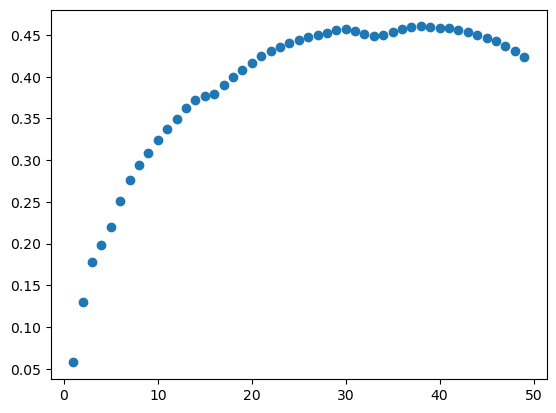

In [230]:
seq, length, trimmed = backward_selection(data.iloc[:1000])
plt.scatter(length, seq)

In [231]:
seq.index(max(seq))

11

In [232]:
test(data.iloc[1000:], trimmed[seq.index(max(seq))])

0.37621670686614306

In [233]:
print(list(trimmed[seq.index(max(seq))]))

[0, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49]


0.2719290137618664 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.30675243908180866 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49}
0.3389714499642663 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49}
0.36359886923980367 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49}
0.3781083685190453 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49}
0.392694

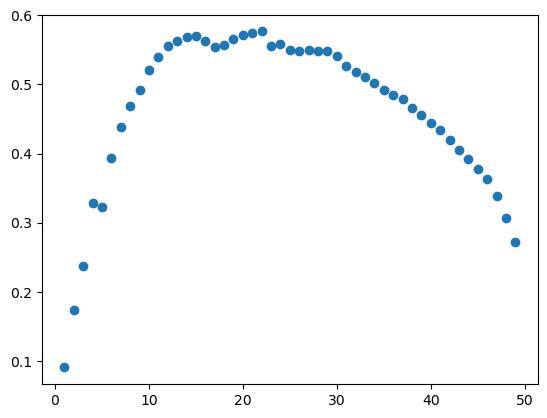

In [234]:
seq, length, trimmed = backward_selection(data.iloc[:100])
print("Test:", test(data.iloc[1000:], trimmed[seq.index(max(seq))]))
print(list(trimmed[seq.index(max(seq))]))
plt.scatter(length, seq)

In [235]:
test(data.iloc[1000:], [i for i in range(50)])

0.341911955614931

In [236]:
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.250000,69.059998,62.080002,31.799999,63.009998,28.299999,36.930000,43.230000,42.310001,67.370003,...,74.389999,41.299999,30.049999,39.529999,76.070000,28.620001,72.029999,24.020000,76.029999,27.500000
1,38.110001,69.980003,62.389999,31.740000,62.490002,28.230000,37.130001,42.849998,41.849998,68.410004,...,74.690002,41.700001,30.180000,38.930000,75.709999,28.469999,72.110001,24.040001,76.050003,27.540001
2,37.900002,69.559998,62.820000,31.570000,62.740002,28.600000,36.570000,42.990002,41.480000,69.839996,...,75.139999,41.139999,30.090000,38.169998,75.559998,28.480000,72.540001,23.760000,75.660004,27.549999
3,37.639999,69.389999,63.259998,31.559999,61.849998,28.670000,37.090000,43.230000,41.240002,70.360001,...,75.239998,41.380001,30.080000,38.240002,75.349998,28.590000,73.750000,23.969999,75.709999,27.740000
4,37.700001,69.709999,64.040001,31.420000,62.020000,28.420000,37.090000,42.900002,41.400002,69.120003,...,75.330002,41.689999,30.340000,37.849998,75.209999,28.549999,74.320000,24.010000,75.769997,27.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.200001,47.240002,47.099998,25.660000,41.450001,22.240000,23.719999,40.320000,15.130000,42.150002,...,98.389999,52.240002,19.639999,26.540001,78.010002,20.830000,78.470001,15.550000,67.349998,25.780001
1496,36.880001,46.910000,47.500000,26.070000,41.439999,22.100000,23.690001,40.090000,14.830000,41.799999,...,97.400002,52.939999,19.940001,26.299999,77.589996,20.980000,79.360001,15.520000,67.290001,26.049999
1497,36.990002,47.299999,47.669998,26.200001,41.680000,22.150000,23.520000,40.310001,14.670000,41.549999,...,96.919998,53.320000,19.920000,26.510000,77.839996,20.889999,78.669998,15.370000,67.010002,26.219999
1498,36.790001,47.230000,47.299999,25.730000,41.639999,22.129999,23.120001,40.570000,14.540000,42.310001,...,97.180000,54.099998,19.900000,26.549999,77.000000,20.790001,78.669998,15.450000,67.300003,26.440001


In [237]:
# Dual annealing for testing
from scipy.optimize import dual_annealing
def objective_function(chosen, arg=(data_train, data_test)):
    chosen = [i for i in range(50) if chosen[i] > 0.5]
    return -test(data.iloc[1000:], set(chosen))


NameError: name 'data_train' is not defined